In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

C:\Users\blacat\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\blacat\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (10, 7)

In [4]:
digits = datasets.load_digits()

In [5]:
X = pd.DataFrame(digits['data'])
X.shape

(1797, 64)

In [6]:
Ydm = pd.get_dummies(digits['target'])
Ydm.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Ydm, test_size = 0.3, random_state = 0 )

In [10]:
X_train.reset_index(inplace = True)
Y_train.reset_index(inplace = True)

In [11]:
X_test.reset_index(inplace = True)
Y_test.reset_index(inplace = True)

In [12]:
del X_train['index']
del X_test['index']

In [13]:
del Y_train['index']
del Y_test['index']

In [14]:
X_train.shape

(1257, 64)

In [15]:
Y_train.shape

(1257, 10)

In [16]:
from sklearn import linear_model

In [17]:
model_log = linear_model.LogisticRegression()

Логистическая регрессия обладает широким набором параметров, подбор которых для наилучшей работы алгоритма 
потребовал три версии сеток для метода GridSearch

In [39]:
# проверки показали, что не сходится при данных параметрах для алгоритма 'saga', ресурсоемкий, 
# поэтому работу с алгоритмом 'saga' оставила


#param_log2 = { 'penalty' : [ 'l1', 'l2'], 
#              'dual' : [False], 
#              'C' : np.array(range(1,11, 2))*0.1,
#              'fit_intercept' : [True, False], 
#              'intercept_scaling' : np.array(range(1,10))*0.1 , 
#              'solver' : ['saga'], 
#              'warm_start' : [True, False] 
#            }

In [28]:
param_log = { 'penalty' : [ 'l1', 'l2'], 
              'C' : np.array(range(1,11, 2))*0.1,
              'fit_intercept' : [True, False], 
              'intercept_scaling' : np.array(range(1,10))*0.1 , 
              'solver' : ['liblinear'], 
              'verbose' : np.array(range(1,4, 2)), 
            }

In [33]:
param_log3 = {'penalty' : [ 'l2'], 
              'C' : np.array(range(1,11, 2))*0.1,
              'fit_intercept' : [True, False],
              'max_iter' : [1000],
              'intercept_scaling' : np.array(range(1,10))*0.1 , 
              'solver' : ['newton-cg','lbfgs', 'sag'], 
              'verbose' : np.array(range(1,4)), 
              'warm_start' : [True, False] 
    
}

Подбор лучших параметров с методом liblinear

In [23]:
grid_log = GridSearchCV (model_log, param_grid = param_log, scoring = 'accuracy', n_jobs = -1 )

In [25]:
%%time
for i in range(0, 10):
    grid_log.fit(X_train, Y_train[i])
    print('class: {:2d} best_params: {}'.format(i, grid_log.best_params_) )
    print('score: {:.5f}'.format(grid_log.best_score_) )

[LibLinear]class:  0 best_params: {'C': 0.30000000000000004, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 1}
score: 0.99841
[LibLinear]class:  1 best_params: {'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'penalty': 'l1', 'solver': 'liblinear', 'verbose': 1}
score: 0.97534
[LibLinear]class:  2 best_params: {'C': 0.30000000000000004, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 1}
score: 0.99920
[LibLinear]class:  3 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 1}
score: 0.98568
[LibLinear]class:  4 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'penalty': 'l2', 'solver': 'liblinear', 'verbose': 1}
score: 0.99523
[LibLinear]class:  5 best_params: {'C': 0

Ниже приведен вариант подбора параметров для алгоритмов: 'newton-cg','lbfgs', 'sag' (параметры заданы 
в переменной param_log3)

Третья версия параметров занимает очень большое время для расчета, ресурсоемкая. Получаемая точность по сравнению с алгоритмом liblinea нервноценна ко времени ожидания результата. Точность улучшается примерно на несколько десятых или тысячных.

In [35]:
grid_log3 = GridSearchCV (model_log, param_grid = param_log3, scoring = 'accuracy', n_jobs = 1 )

In [38]:
%%time
for i in range(0, 10):
    grid_log3.fit(X_train, Y_train[i])
    print('class: {:2d} best_params: {}'.format(i, grid_log3.best_params_) )
    print('score: {:.5f}'.format(grid_log3.best_score_) )

convergence after 650 epochs took 1 seconds
class:  0 best_params: {'C': 0.5, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'verbose': 2, 'warm_start': True}
score: 0.99920


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


class:  1 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 1, 'warm_start': True}
score: 0.98011
convergence after 566 epochs took 0 seconds
class:  2 best_params: {'C': 0.30000000000000004, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'verbose': 1, 'warm_start': True}
score: 0.99920


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


convergence after 335 epochs took 0 seconds
class:  3 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'verbose': 1, 'warm_start': True}
score: 0.98568


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


class:  4 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 1, 'warm_start': True}
score: 0.99602


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


class:  5 best_params: {'C': 0.70000000000000007, 'fit_intercept': False, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 1, 'warm_start': True}
score: 0.99284
convergence after 310 epochs took 0 seconds
class:  6 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'verbose': 1, 'warm_start': True}
score: 0.99602


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished


convergence after 296 epochs took 1 seconds
class:  7 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag', 'verbose': 1, 'warm_start': False}
score: 0.99523


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


class:  8 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 1, 'warm_start': True}
score: 0.96022
class:  9 best_params: {'C': 0.10000000000000001, 'fit_intercept': True, 'intercept_scaling': 0.10000000000000001, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'newton-cg', 'verbose': 1, 'warm_start': True}
score: 0.98568
Wall time: 1h 10min 25s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Поэтому для работы берем алгоритм liblinea, c наиболее часто встречающимися параметрами. 
Параметр регуляризации С беререм 0,3, чтобы не приходить к переобучению (уменьшаем регуляризацию).

In [60]:
model_log_param = linear_model.LogisticRegression( C = 0.3, fit_intercept= True, 
                                                    intercept_scaling = 0.1, penalty = 'l2',
                                                    solver = 'liblinear',
                                                    verbose = 1)

Посмотрим, даст ли что-то разбиение на фолды. Кросс-валидацией не занимаемся, тк среднее одинаково для 
всех разбиений в пределах отклонения.

In [42]:
for i in range(2, 15):
    cv = cross_val_score(model_log_param, X_train, Y_train[8], cv = i, n_jobs = -1)
    print('folds: {:2d}, mean: {:.4f}, std: {:.4f}'. format(i, cv.mean(), cv.std() ) )

folds:  2, mean: 0.9523, std: 0.0016
folds:  3, mean: 0.9547, std: 0.0052
folds:  4, mean: 0.9546, std: 0.0062
folds:  5, mean: 0.9507, std: 0.0081
folds:  6, mean: 0.9531, std: 0.0097
folds:  7, mean: 0.9515, std: 0.0157
folds:  8, mean: 0.9546, std: 0.0113
folds:  9, mean: 0.9530, std: 0.0136
folds: 10, mean: 0.9571, std: 0.0133
folds: 11, mean: 0.9547, std: 0.0173
folds: 12, mean: 0.9531, std: 0.0170
folds: 13, mean: 0.9546, std: 0.0150
folds: 14, mean: 0.9546, std: 0.0195


Предсказание с помощью модели

In [43]:
y_proba_log = dict()

In [67]:
for i in range(0, 10):
    model_log_param.fit(X_train, Y_train[i])
    y_proba_log[i] = model_log_param.predict_proba(X_test)
    print('class:{:2d} expl_var score {:.5f}'. format(i, explained_variance_score( Y_test[i],  y_proba_log[i][:,1])))
    print('class:{:2d} r2 score {:.5f}'. format(i, r2_score( Y_test[i],  y_proba_log[i][:,1])))

[LibLinear]class: 0 expl_var score 0.97645
class: 0 r2 score 0.97645
[LibLinear]class: 1 expl_var score 0.73413
class: 1 r2 score 0.73379
[LibLinear]class: 2 expl_var score 0.98537
class: 2 r2 score 0.98536
[LibLinear]class: 3 expl_var score 0.84587
class: 3 r2 score 0.84566
[LibLinear]class: 4 expl_var score 0.96643
class: 4 r2 score 0.96624
[LibLinear]class: 5 expl_var score 0.92424
class: 5 r2 score 0.92396
[LibLinear]class: 6 expl_var score 0.90759
class: 6 r2 score 0.90744
[LibLinear]class: 7 expl_var score 0.93436
class: 7 r2 score 0.93428
[LibLinear]class: 8 expl_var score 0.65840
class: 8 r2 score 0.65770
[LibLinear]class: 9 expl_var score 0.82849
class: 9 r2 score 0.82841


In [68]:
y_proba_log[0].shape # второй столбец отвечает за то, что класс True

(540, 2)

In [69]:
fpr_log = dict()
tpr_log = dict()
thr_log = dict()
roc_auc_log = dict()

fpr_log.clear()
tpr_log.clear()
thr_log.clear()
roc_auc_log.clear()

In [70]:
for i in range(0, 10):
    fpr_log[i] , tpr_log[i] , thr_log[i] = roc_curve( Y_test[i], y_proba_log[i][:,1] )
    roc_auc_log[i] = auc( fpr_log[i], tpr_log[i] )

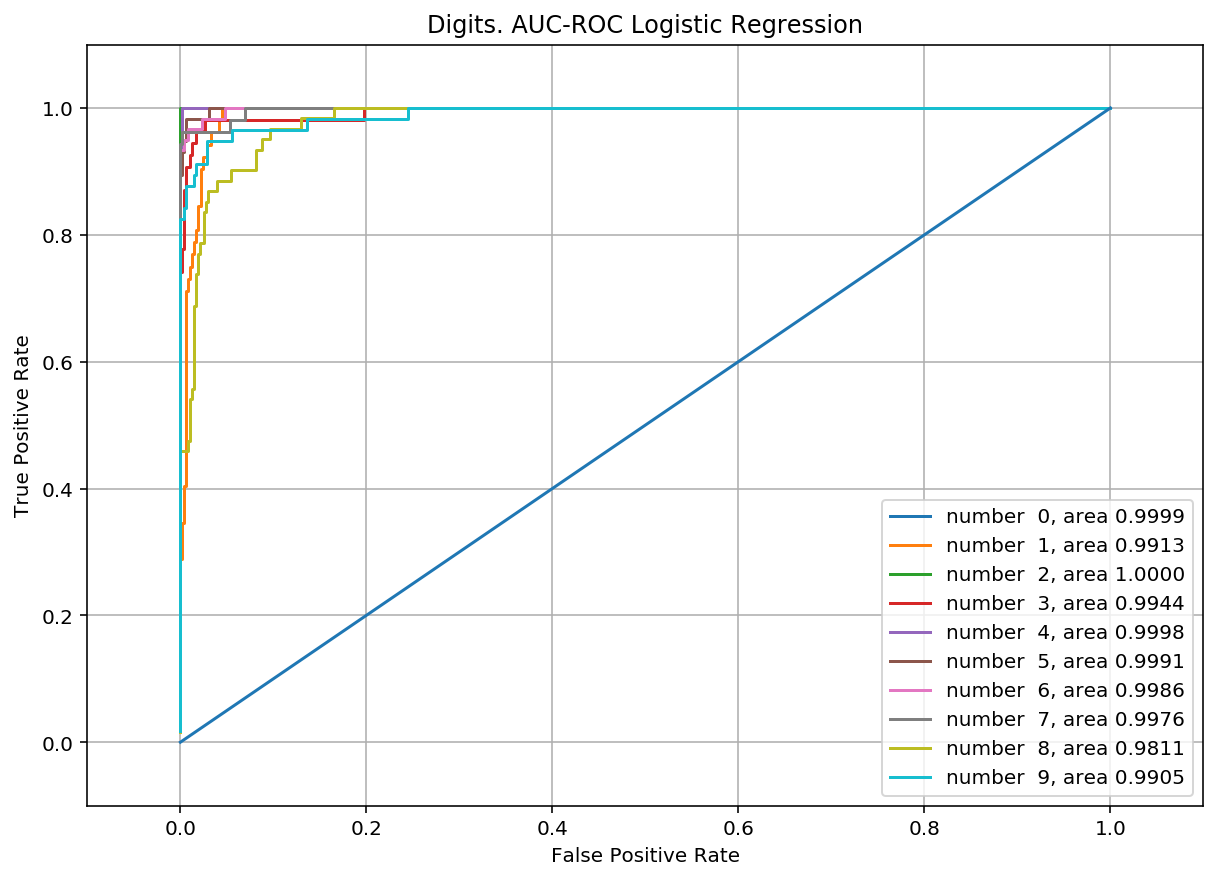

In [72]:
for i in range(0, 10):
    plt.plot( fpr_log[i], tpr_log[i], label='number {:2d}, area {:.4f}'.format(i, roc_auc_log[i]))       
    
plt.plot([0, 1], [0, 1])
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Digits. AUC-ROC Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Для получения качественного результата, который можно оценить не только по графику, посчитаем такой 
искусственный параметр, как сумму площадей под кривой AUC-ROC для всех десяти классов.
При наилучшем исходе приближения такая сумма будет стремиться к 10, тк наилучший результат, 
когда площадь под кривой для каждого из классов равна единице у 10 классов. 

Сравним результат этой суммы после отработки всех трех алгоритмов. 

Суммарная площадь под кривыми AUC-ROC для модели LogisticRegression

In [73]:
ra_log_sum = 0.0
for i in range(0,10):
    ra_log_sum += roc_auc_log[i]

In [74]:
ra_log_sum

9.9523263606161141